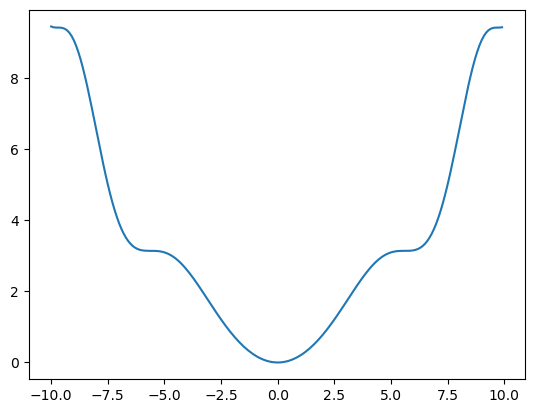

In [4]:
#Gradient Descent     

from numpy import *
from matplotlib.pyplot import *

def f(x):
    # f(x) = 0.1x^2 + sin(0.1x^2)
    return 0.1*x**2 + sin(0.1*x**2)

x = arange(-10, 10, 0.1)
y = f(x)
plot(x, y)
show()


In [5]:
# define derivative because we know it ! Check derivative function in scipy.
def df(x):
    return 0.2*x + 0.2*x*cos(0.1*(x**2))

In [6]:
def grad_descent(df,x_prev,learn_rate, sequence):

    epsilon = 0.001
    grad_itter = 1
    x_next = x_prev - learn_rate*df(x_prev)
    sequence = np.append(sequence, x_next)

    # while abs(x_{t+1} - x_{t}) > threshold, keep iterating gradient descent
    while abs(x_next - x_prev) > epsilon:
        # Update x_{t}
        x_prev = x_next
        # Gradient descent step
        # Set new x_{t+1} = x_{t} - step*f'(x_{t})
        x_next = x_prev - learn_rate*df(x_prev)
        # Save itteration 
        sequence = np.append(sequence, x_next)
        # Increment itteration
        grad_itter += 1
        
    return (x_next, sequence, grad_itter)


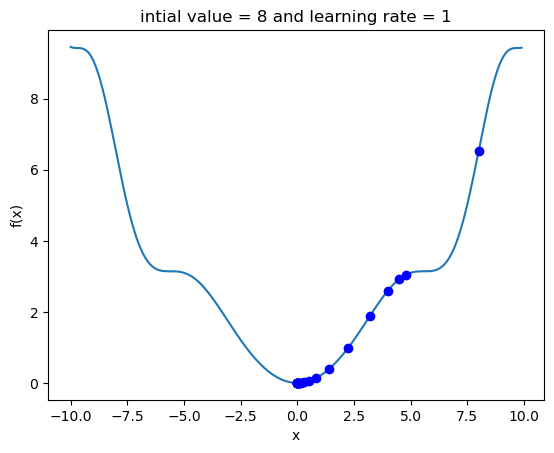

min  0.0011070554765544726


In [7]:
# Initial value x1 = 8 and learn rate learning rate = 1
import numpy as np
grad_output = grad_descent(df,8,1, np.array([8]))


#function to plot mathematical functions of form y = f(x)
def plotf(x, xdots, label):

    # Compute y-values
    y = f(x)

    # Plot (x, f(x))
    plot(x,y)
    xlabel("x")
    ylabel("f(x)")
    title(label)
    
    # Plot points on f(x)
    plot(xdots, f(xdots), 'bo')
    show()

# Plot converging sequence on f(x)
plotf(x, grad_output[1], "intial value = 8 and learning rate = 1")

# Print gradient descent solution
print('min ',grad_output[0])

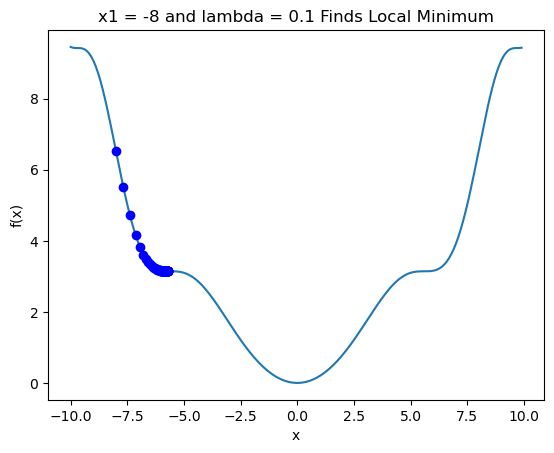

min  -5.719827452846893


In [8]:
# Initial value x1 = 8 and learning rate 0.1
grad_output = grad_descent(df,-8,0.1, np.array([-8]))

plotf(x, grad_output[1], "x1 = -8 and lambda = 0.1 Finds Local Minimum")


print('min ',grad_output[0])

/var/folders/5r/sdzjlx790r9gqyhhn0g9hj6w0000gn/T/ipykernel_61952/450391168.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


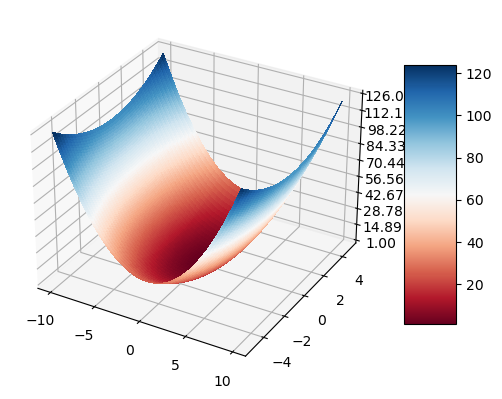

In [9]:
#lets try a function with two variables

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
y = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)

Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()


In [10]:
# Partial derivatives

# df/dx = 2x
def dfdx(x,y):
    return 2*x

# df/dy = 2y
def dfdy(x,y):
    return 2*y

# Gradient matrix/vector [df/dx, df/dy]
def grad_vector(x,y):
    return np.array([dfdx(x,y), dfdy(x,y)])

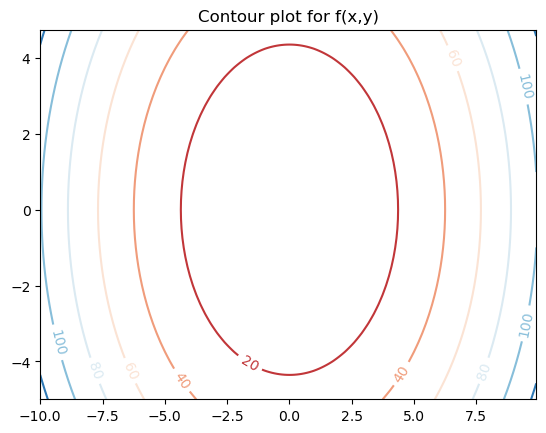

In [11]:


# Function for contour plot with points 
def contour_plot(x_seq,y_seq, x1):
    # Contour plots for f(x,y) = x^2 + y^2 + 1
    figure(1)
    CS = contour(X, Y, Z, cmap=cm.RdBu)
    clabel(CS, inline=1, fontsize=10)
    # Initial point
    plot(x1[0],x1[1],'ro')
    # Sequence of points from gradient descent itterations
    plot(x_seq,y_seq,'ro')
    title('Contour plot for f(x,y)')
    show()
# Make a Contour plot with no points
contour_plot([],[],[[],[]])

In [12]:
# Gradient descent for multiple variable
import numpy as np
def grad_descent_mult(df,x_prev,learn_rate):
    epsilon = 0.001
    grad_itter = 1
    seq_x = []
    seq_y = []
    x_next = np.subtract(x_prev, learn_rate*df(x_prev[0],x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    # Itterate until abs(x_{t+1} - x_{t}) < epsilon
    # abs(x_{t+1} - x_{t}) is defined as euclidean distance 
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        # Update x_{t}
        x_prev = x_next

        # Gradient descent step
        # Set new x_{t+1} = x_{t} - lambda*[df/dx df/dy]
        x_next = x_prev - learn_rate*df(x_prev[0],x_prev[1])
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next, grad_itter, seq_x,seq_y)



In [13]:
# intial value x1 = [6,2] and learning rate = 0.2
grad_output = grad_descent_mult(grad_vector, np.array([6,2]), 0.2)

print('Min ',grad_output[0])

# Convergence sequence (x_t,y_t) on contour plot
#contour_plot(grad_output[2],grad_output[3], np.array([6,2]))

Min  [0.0010156  0.00033853]


In [14]:
#Example for Scipy optimize, without writing the functions 
from scipy import optimize

In [15]:
def f(x):
    # f(x) = 0.1x^2 + sin(0.1x^2)
    return 0.1*x**2 + sin(0.1*x**2)
result = optimize.minimize_scalar(f)

In [16]:
result.success

True

In [18]:
type(result)

scipy.optimize._optimize.OptimizeResult

In [15]:
x_min = result.x

In [16]:
x_min

0.0

In [17]:
f(0)

0.0

In [18]:
import scipy.optimize as optimize

def f(params):
    x, y = params 
    return x**2 + y**2 + 1

initial_guess = [0,0]
result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print(fitted_params)
else:
    raise ValueError(result.message)

[0. 0.]


In [19]:
params = 0,0

In [20]:
f(params)

1

In [21]:
#numerical derivative example - 
from scipy.misc import derivative
def f(x):
    return x**3 + x**2

derivative(f, 1.0, dx=1e-6)

4.999999999921734